In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
#configuration
pd.set_option('display.max_columns',100)
import pickle as pk

In [78]:
data = pd.read_csv('32_Murder_victim_age_sex.csv')
data.fillna(0,inplace=True)
print(f'the data has:{data.shape[0]} rows and no.of columns: {data.shape[1]}\n')
data = data[data['Sub_Group_Name']!= '3. Total']
data.head()

the data has:1018 rows and no.of columns: 11



,Area_Name,Year,Group_Name,Sub_Group_Name,Victims_Above_50_Yrs,Victims_Total,Victims_Upto_10_15_Yrs,Victims_Upto_10_Yrs,Victims_Upto_15_18_Yrs,Victims_Upto_18_30_Yrs,Victims_Upto_30_50_Yrs
0,Andaman & Nicobar Islands,2001,Murder - Female Victims,2. Female Victims,0.0,6,0.0,0.0,0.0,4.0,2.0
1,Andhra Pradesh,2001,Murder - Female Victims,2. Female Victims,67.0,607,15.0,38.0,43.0,269.0,175.0
2,Arunachal Pradesh,2001,Murder - Female Victims,2. Female Victims,2.0,16,0.0,0.0,0.0,10.0,4.0
3,Assam,2001,Murder - Female Victims,2. Female Victims,11.0,128,8.0,4.0,23.0,45.0,37.0
4,Bihar,2001,Murder - Female Victims,2. Female Victims,12.0,366,0.0,0.0,40.0,191.0,123.0


In [151]:
list(data.Year.unique())

[2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010]

In [79]:
data = data.assign(
    Sub_Group_Name = lambda x:x['Sub_Group_Name'].replace({
        '2. Female Victims': 'Female',
        '1. Male Victims': 'Male'
    }),
    Area_Name= lambda x:x['Area_Name'].str.upper()
)

In [80]:
data2= pd.read_csv('01_District_wise_crimes_committed_IPC_2001_2012.csv')
data.fillna(0,inplace=True)
print(f'the data has:{data2.shape[0]} rows and no.of columns: {data2.shape[1]}\n')
data2.head()

the data has:9017 rows and no.of columns: 33



,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,PREPARATION AND ASSEMBLY FOR DACOITY,ROBBERY,BURGLARY,THEFT,AUTO THEFT,OTHER THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,30,16,9,0,41,198,199,22,177,78,16,104,1,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,30,23,8,0,16,191,366,57,309,168,11,65,8,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,34,25,4,0,14,237,723,164,559,156,33,209,9,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,20,5,1,0,4,98,173,36,137,164,12,37,2,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,26,23,4,0,25,437,1021,150,871,70,50,220,3,41,1244,12,109,58,247,0,431,2313,6507


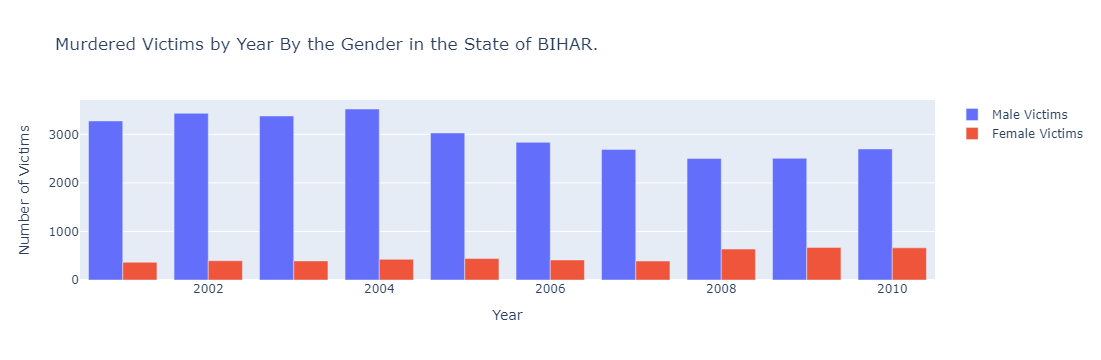

In [81]:
def murdered_gender(state):
    df=data[data['Area_Name']==state]
    pivot_data = df.pivot_table(index='Year', columns='Sub_Group_Name', values='Victims_Total')

    fig = go.Figure(data=[
        go.Bar(name='Male Victims', x=pivot_data.index, y=pivot_data['Male']),
        go.Bar(name='Female Victims', x=pivot_data.index, y=pivot_data['Female'])
    ])

    fig.update_layout(
        title=f'Murdered Victims by Year By the Gender in the State of {state}.',
        xaxis_title='Year',
        yaxis_title='Number of Victims',
        barmode='group' 
    )
    
    fig.show()

murdered_gender("BIHAR")

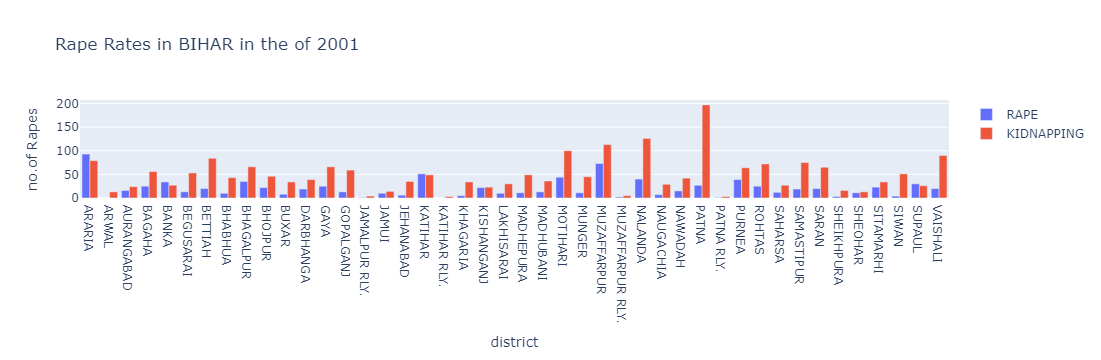

In [82]:
def kid_rape(state,year):
    df=data2[(data2['STATE/UT']==state) & (data2['YEAR']==year)&(data2['DISTRICT']!='TOTAL')]
    fig = go.Figure(data=[
        go.Bar(name='RAPE',x=df.DISTRICT,y=df.RAPE),
        go.Bar(name='KIDNAPPING',x=df.DISTRICT,y=df['KIDNAPPING & ABDUCTION']),
        
    ])
    fig.update_layout(
        title=f'Rape Rates in {state} in the of {year}',
        xaxis_title='district',
        barmode='group',
        yaxis_title='no.of Rapes'
    )
    fig.show()

kid_rape('BIHAR',2001)

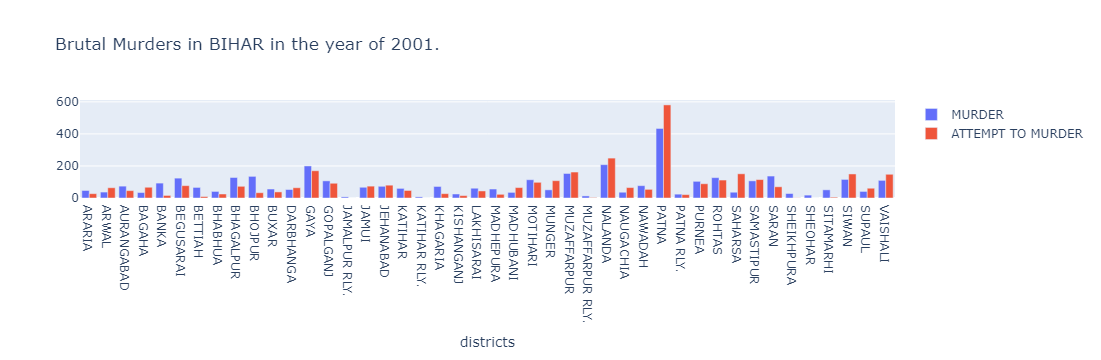

In [125]:
def murder_Bydistrict(state,year):
    df2 = data2[(data2['STATE/UT']==state)&(data2['YEAR']==year)&(data2['DISTRICT']!='TOTAL')]
    
    fig=go.Figure(data=[
        go.Bar(name='MURDER',x=df2.DISTRICT,y=df2.MURDER),
        go.Bar(name='ATTEMPT TO MURDER',x=df2.DISTRICT,y=df2['ATTEMPT TO MURDER'])
    ])
    fig.update_layout(
        barmode='group',
        xaxis_title='districts',
        title=f'Brutal Murders in {state} in the year of {year}.'
                    )
    fig.show()

murder_district('BIHAR',2001)

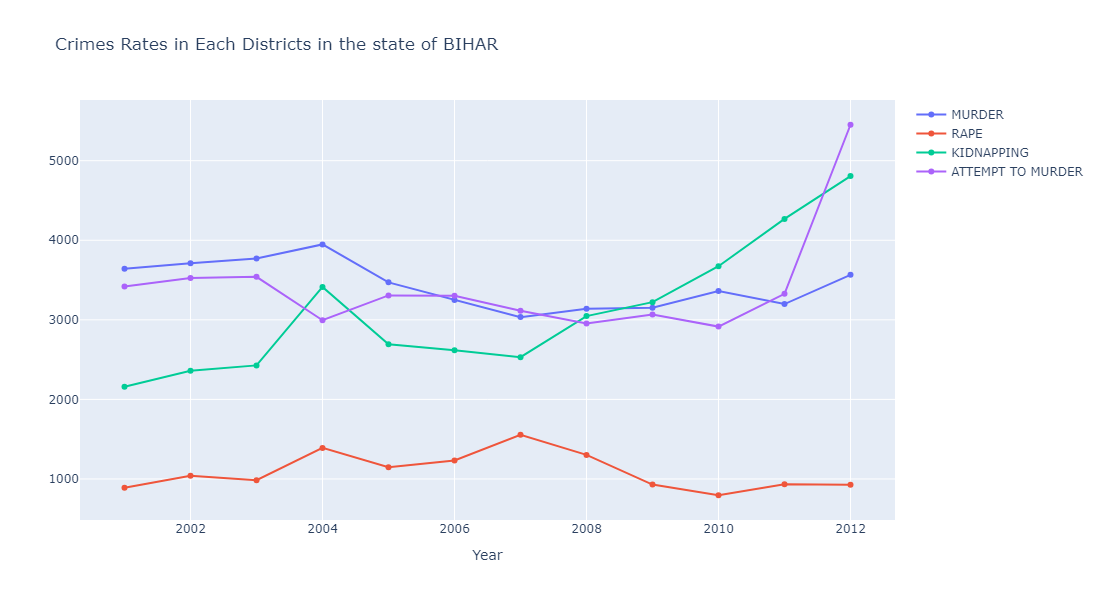

In [127]:
def crimes_line_plot(state):
    df1=data2[(data2['DISTRICT']=='TOTAL')&(data2['STATE/UT']==state)]
    fig = go.Figure(data=[
        go.Scatter(name='MURDER',x=df1.YEAR,y=df1.MURDER),
        go.Scatter(name='RAPE',x=df1.YEAR,y=df1.RAPE),
        go.Scatter(name='KIDNAPPING',x=df1.YEAR,y=df1['KIDNAPPING & ABDUCTION']),
        go.Scatter(name='ATTEMPT TO MURDER',x=df1.YEAR,y=df1['ATTEMPT TO MURDER'])
    ])
    
    fig.update_layout(
        title=f'Crimes Rates in Each Districts in the state of {state}',
        autosize=False,
        xaxis_title='Year',
        width=800, 
        height=600)
    
    
    fig.show()

crimes_line('BIHAR')

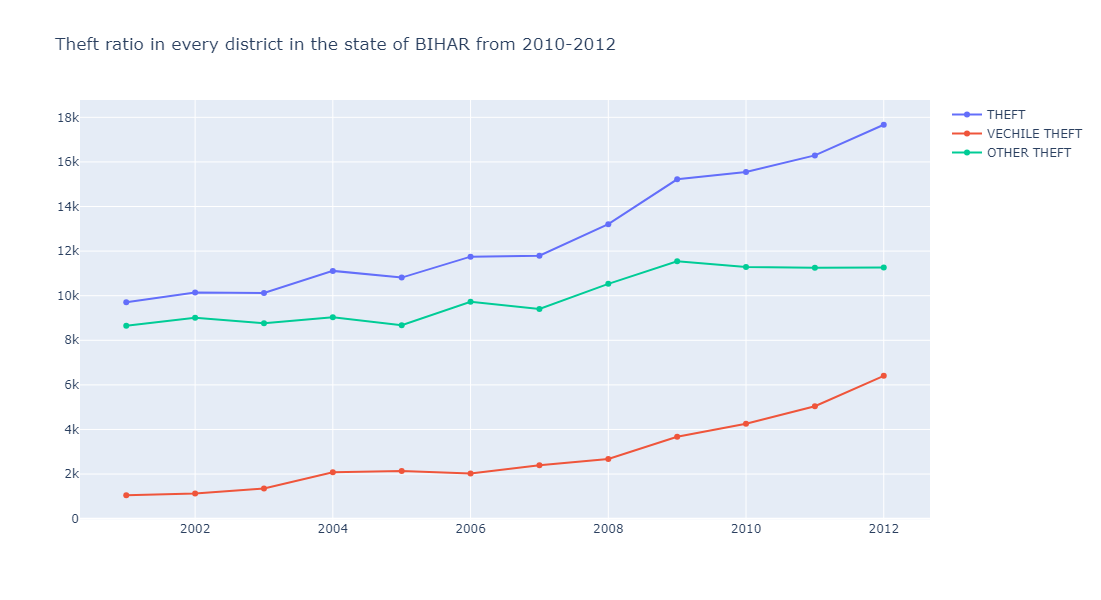

In [85]:
def theft(state):
    df1=data2[(data2['DISTRICT']=='TOTAL')&(data2['STATE/UT']==state)]
    fig=go.Figure(data=[
        go.Scatter(name='THEFT',x=df1.YEAR,y=df1.THEFT),
        go.Scatter(name='VECHILE THEFT',x=df1.YEAR,y=df1['AUTO THEFT']),
        go.Scatter(name='OTHER THEFT',x=df1.YEAR,y=df1['OTHER THEFT'])
    ])
    
    fig.update_layout(
        title=f'Theft ratio in every district in the state of {state} from 2010-2012',
        autosize=False, 
        width=800, 
        height=600
    )
    
    
    fig.show()

theft('BIHAR')

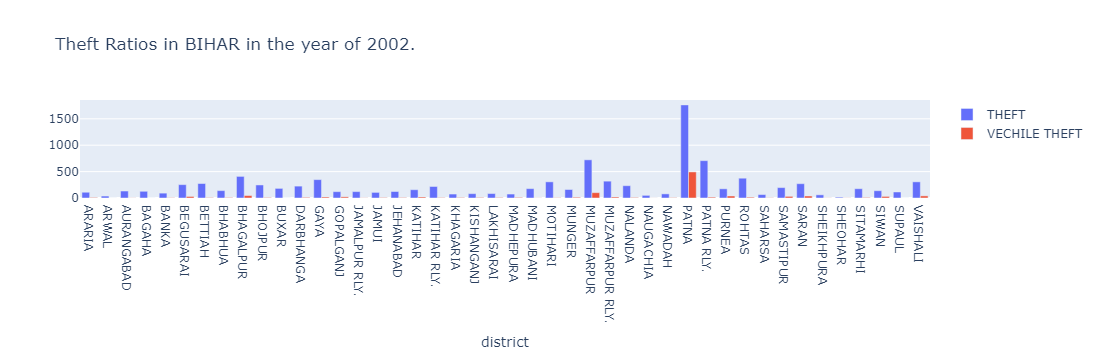

In [86]:
def theft_byDist(state,year):
    df2 = data2[(data2['STATE/UT']==state)&(data2['YEAR']==year)&(data2['DISTRICT']!='TOTAL')]
    fig=go.Figure(data=[
        go.Bar(name='THEFT',x=df2.DISTRICT,y=df2.THEFT),
        go.Bar(name='VECHILE THEFT',x=df2.DISTRICT,y=df2['AUTO THEFT'])
    ])
    fig.update_layout(
        barmode='group',
        title=f'Theft Ratios in {state} in the year of {year}.',
        xaxis_title='district'
    )

    fig.show()
theft_byDist('BIHAR',2002)

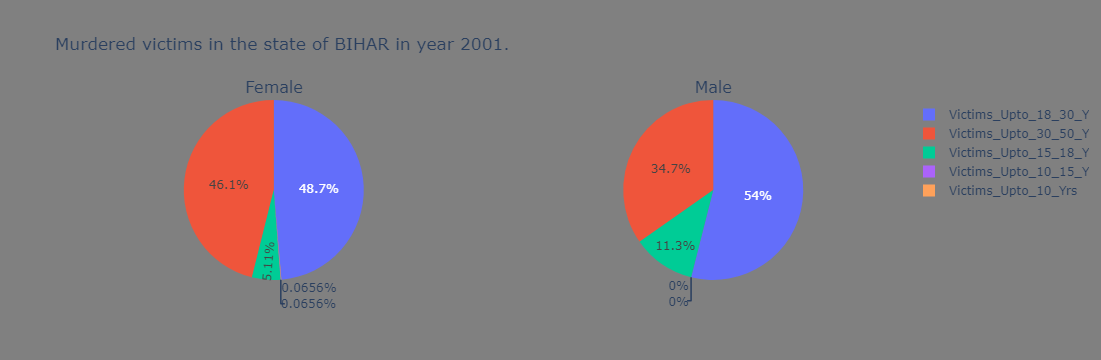

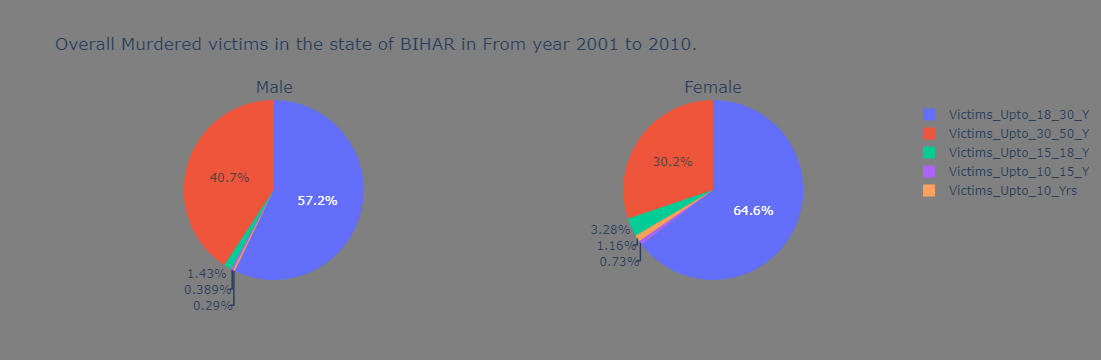

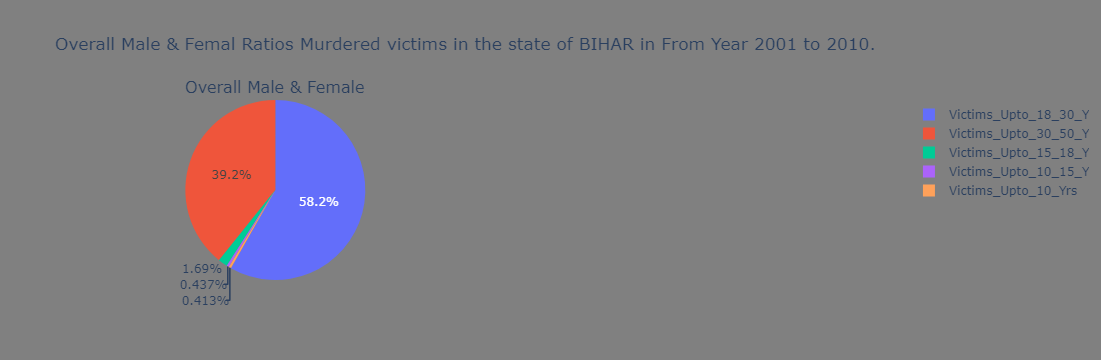

In [87]:
def victims(state,year):
    transpose = data[data['Area_Name'] == state].set_index('Year').T
    
    transpose = transpose.assign(
        total_female=transpose.iloc[:, :10].apply(lambda x: pd.to_numeric(x, errors='coerce')).sum(axis=1),
        total_male=transpose.iloc[:, 10:].apply(lambda x: pd.to_numeric(x, errors='coerce')).sum(axis=1),
        total=transpose.iloc[:, :].apply(lambda x: pd.to_numeric(x, errors='coerce')).sum(axis=1)
    )
    column_selection = transpose.loc[:, transpose.columns == year]
    row_selection = transpose.iloc[:,20:]
    result = pd.concat([column_selection, row_selection],axis=1)
    result.columns.values[:2] = ['Male','Female']
    result = result.drop(index=['Victims_Total', 'Group_Name', 'Area_Name','Sub_Group_Name'], axis=0)
    result = result.iloc[1:,:]
    fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]], subplot_titles=["Female", "Male"])

    fig.add_trace(go.Pie(name='Male', labels=result.index, values=result.iloc[:,1].values), 1, 1)
    fig.add_trace(go.Pie(name='Female', labels=result.index, values=result.iloc[:,0].values), 1, 2)
    
    fig.update_layout({
        'paper_bgcolor': 'grey',
    },
        title=f'Murdered victims in the state of {state} in year {year}.'
            
                     )
    
    fig.show()
    
    fig2 = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]], subplot_titles=["Male", "Female"])

    fig2.add_trace(go.Pie(name='Male', labels=result.index, values=result.iloc[:,3].values), 1, 1)
    fig2.add_trace(go.Pie(name='Female', labels=result.index, values=result.iloc[:,2].values), 1, 2)
    
    fig2.update_layout({
        'paper_bgcolor': 'grey',
    },
        title=f'Overall Murdered victims in the state of {state} in From year 2001 to 2010.'
            
                     )
    
    fig2.show()
    fig3 = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]], subplot_titles=["Overall Male & Female"])

    fig3.add_trace(go.Pie(name='Overall Male & Female', labels=result.index, values=result.iloc[:,4].values), 1, 1)
   
    
    fig3.update_layout({
        'paper_bgcolor': 'grey',
    },
        title=f'Overall Male & Femal Ratios Murdered victims in the state of {state} in From Year 2001 to 2010.'
            
                     )
    
    fig3.show()

victims('BIHAR',2001)

# Correlation Analyisis

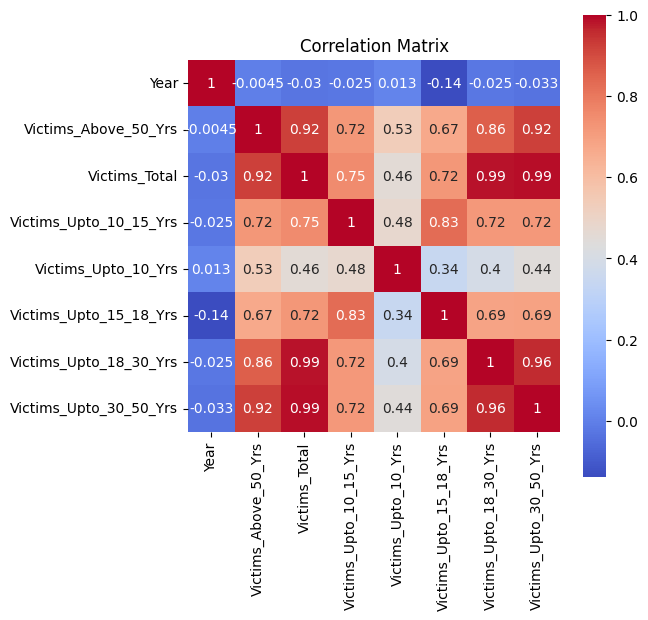

In [88]:

matrix = data.select_dtypes([int,float]).corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

In [117]:
print('\t\t Higlist POSTIVE Correlation\n')
for col in  data.select_dtypes([int,float]).columns.values:
    corr = list(matrix[col].sort_values(ascending=False).items())[1]
    print(f' {col} : {corr[0]} : {corr[1]}\n ')

		 Higlist POSTIVE Correlation

 Year : Victims_Upto_10_Yrs : 0.012631426599502688
 
 Victims_Above_50_Yrs : Victims_Upto_30_50_Yrs : 0.92388231377087
 
 Victims_Total : Victims_Upto_30_50_Yrs : 0.9896879151405273
 
 Victims_Upto_10_15_Yrs : Victims_Upto_15_18_Yrs : 0.828819077844473
 
 Victims_Upto_10_Yrs : Victims_Above_50_Yrs : 0.5345512508106929
 
 Victims_Upto_15_18_Yrs : Victims_Upto_10_15_Yrs : 0.828819077844473
 
 Victims_Upto_18_30_Yrs : Victims_Total : 0.9854159765384698
 
 Victims_Upto_30_50_Yrs : Victims_Total : 0.9896879151405273
 


In [120]:
matrix_2 = data2.select_dtypes([int,float]).corr()

print('\t\t Higlist POSTIVE Correlation\n')
for col in  data2.select_dtypes([int,float]).columns.values:
    corr = list(matrix_2[col].sort_values(ascending=False).items())[1]
    print(f' {col} : {corr[0]} : {corr[1]}\n ')

		 Higlist POSTIVE Correlation

 YEAR : KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS : 0.07418773062789165
 
 MURDER : ATTEMPT TO MURDER : 0.9581195441164574
 
 ATTEMPT TO MURDER : MURDER : 0.9581195441164574
 
 CULPABLE HOMICIDE NOT AMOUNTING TO MURDER : DOWRY DEATHS : 0.8673012660998577
 
 RAPE : OTHER RAPE : 0.9999998210356164
 
 CUSTODIAL RAPE : DACOITY : 0.1581048544381784
 
 OTHER RAPE : RAPE : 0.9999998210356164
 
 KIDNAPPING & ABDUCTION : KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS : 0.9818322007466224
 
 KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS : KIDNAPPING & ABDUCTION : 0.9818322007466224
 
 KIDNAPPING AND ABDUCTION OF OTHERS : KIDNAPPING & ABDUCTION : 0.8486607055416934
 
 DACOITY : ROBBERY : 0.8073719769630633
 
 PREPARATION AND ASSEMBLY FOR DACOITY : CRUELTY BY HUSBAND OR HIS RELATIVES : 0.6040476197220169
 
 ROBBERY : THEFT : 0.8662406723416923
 
 BURGLARY : OTHER THEFT : 0.92029296650917
 
 THEFT : OTHER THEFT : 0.975227089088765
 
 AUTO THEFT : THEFT : 0.9329580799543

# Pickle

In [123]:
with open('murdered_gender.pkl','wb') as file:
    pk.dump(murdered_gender,file)

In [124]:
with open('kid_rape.pkl','wb') as file:
    pk.dump(kid_rape,file)

In [126]:
with open('murder_Bydistrict.pkl','wb') as file:
    pk.dump(murder_Bydistrict,file)

In [128]:
with open('crimes_line_plot.pkl','wb') as file:
    pk.dump(crimes_line_plot,file)

In [129]:
with open('theft.pkl','wb') as file:
    pk.dump(theft,file)

In [130]:
with open('theft_byDist.pkl','wb') as file:
    pk.dump(theft_byDist,file)

In [131]:
with open('victims.pkl','wb') as file:
    pk.dump(victims,file)

In [138]:
import types

def get_function_names():
    functions = [name for name, obj in globals().items() if isinstance(obj, types.FunctionType)]
    return functions

print(get_function_names())

['open', 'make_subplots', 'murdered_gender', 'kid_rape', 'murder_district', 'crimes_line', 'theft', 'theft_byDist', 'victims', 'murder_Bydistrict', 'crimes_line_plot', 'get_function_names', 'func1', 'func2']
